In [2]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines
from sklearn import linear_model, svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import & Preprocess Data

In [3]:
data = pd.read_csv('../data/master_reduced.csv')
data = data[data.columns.difference(['year', 'data_year', 'cfips', 'county', 'state'])]
data.head()

,birth_rate,median_age,median_hh_inc,microbusiness_density,pct_broadband,pct_college,pct_divorced,pct_employed_at_government,pct_employed_at_self_employed,pct_house_price_250k_500k,...,pct_housing_single_detached,pct_in_arts_industry,pct_in_finance_industry,pct_in_it_industry,pct_insured,pct_moved_from_abroad,pct_moved_within_state,pct_with_libarts_degree,pct_with_scieng_degree,total_population
0,71,37.8,55317,2.986972,76.6,14.5,11.6,20.2,8.0,14.761905,...,72.9,8.941606,5.573988,1.3,91.2,0.2,4.9,23.9,29.4,55036
1,50,42.6,52562,7.370375,74.5,20.4,13.1,12.9,11.4,32.877493,...,73.9,10.622494,7.611112,1.4,89.2,0.3,2.1,20.0,27.3,203360
2,70,39.7,33368,1.046068,57.2,7.6,12.2,19.1,9.9,18.859649,...,57.2,6.859653,3.671998,0.5,87.7,0.2,3.4,18.8,22.9,26201
3,74,39.8,43404,1.278288,62.0,8.1,11.2,17.4,8.1,0.000000,...,66.8,3.855097,4.405825,1.2,91.9,0.4,7.3,20.6,22.6,22580
4,58,40.9,47412,1.559113,65.8,8.7,11.2,11.9,7.9,14.893617,...,71.3,4.260992,5.102900,1.3,89.0,0.2,2.6,20.6,22.9,57667


In [4]:
# Scale all features
scaler = StandardScaler()
scaled_data = pd.DataFrame(data = scaler.fit_transform(data), columns = scaler.get_feature_names_out())
scaled_data.head()

y_mean = scaler.mean_[3]
y_var = scaler.var_[3]

In [5]:
X = scaled_data[scaled_data.columns.difference(['microbusiness_density'])]
y = scaled_data.microbusiness_density

seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed)
y_test_unscaled = y_test.map(lambda z: z*math.sqrt(y_var) + y_mean)
y_train_unscaled = y_train.map(lambda z: z*math.sqrt(y_var) + y_mean)

# Linear Regression (No Scaling)

In [21]:
X_ns_train, X_ns_test, y_ns_train, y_ns_test = train_test_split(data[data.columns.difference(['microbusiness_density'])], data.microbusiness_density, test_size = 0.4, random_state = seed)

# Fit model, find coefficients
linear_ns = linear_model.LinearRegression().fit(X_ns_train, y_ns_train)
linear_ns_coefs = pd.DataFrame({'feature': X.columns, 'coef': linear_ns.coef_})

# Find performance on train set
print("Train R-squared: " + str(linear_ns.score(X_ns_train, y_ns_train)))

linear_ns_y_train_pred = linear_ns.predict(X_ns_train)
print("Train RMSE: " + str(mean_squared_error(y_ns_train, linear_ns_y_train_pred, squared=False)))

Train R-squared: 0.3924224489692505
Train RMSE: 3.5188313492819336


Test R-squared: 0.3336472484742222
4.0689284149766936
Test RMSE: 4.0689284149766936


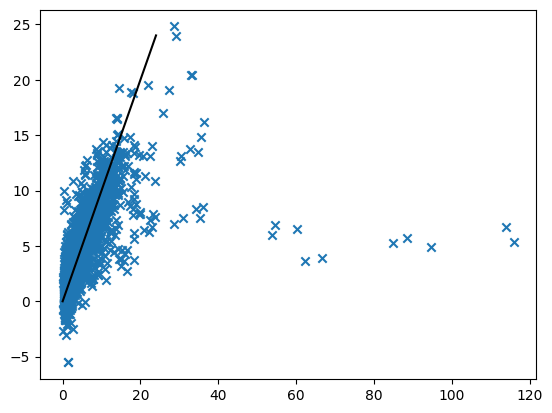

In [22]:
# Find performance on test set
print("Test R-squared: " + str(linear_ns.score(X_ns_test, y_ns_test)))

linear_ns_y_test_pred = linear_ns.predict(X_ns_test)
linear_ns_test_rmse = mean_squared_error(y_ns_test, linear_ns_y_test_pred, squared=False)
print(math.sqrt(statistics.mean((linear_ns_y_test_pred - y_ns_test)*(linear_ns_y_test_pred - y_ns_test))))
print("Test RMSE: " + str(linear_ns_test_rmse))

# Plot result differences (just to see)
linear_ns_test_results = pd.DataFrame({'y_pred': linear_ns_y_test_pred, 'y_true': y_ns_test})
linear_ns_fig, linear_ns_plot = plt.subplots()
linear_ns_plot.plot(range(25), color='black')
linear_ns_plot.scatter(linear_ns_test_results.y_true, linear_ns_test_results.y_pred, marker='x')

# Linear Regression (w/ Scaling)
Should make no difference with no scaling

In [23]:
# Fit model, find coefficients
linear = linear_model.LinearRegression().fit(X_train, y_train)
linear_coefs = pd.DataFrame({'feature': X.columns, 'coef': linear.coef_})

# Find performance on train set
print("Train R-squared: " + str(linear.score(X_train, y_train)))

linear_y_train_pred = linear.predict(X_train)
linear_y_train_pred = linear_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, linear_y_train_pred, squared=False)))

Train R-squared: 0.3924224489692504
Train RMSE (Unscaled): 3.5188313492819336


Test R-squared: 0.33364724847422167
Test RMSE (Unscaled): 4.068928414976694


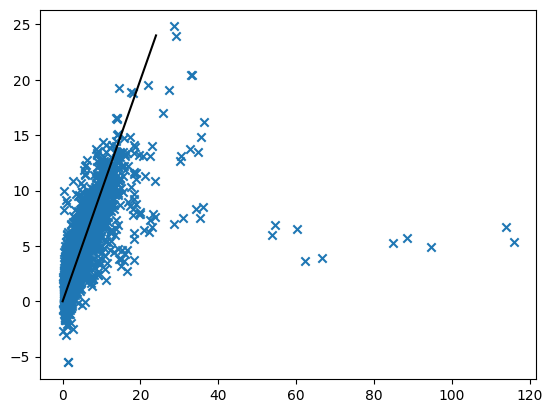

In [24]:
# Find performance on test set
print("Test R-squared: " + str(linear.score(X_test, y_test)))

linear_y_test_pred = linear.predict(X_test)
linear_y_test_pred = linear_y_test_pred*math.sqrt(y_var) + y_mean
linear_test_rmse = mean_squared_error(y_test_unscaled, linear_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(linear_test_rmse))

# Plot result differences (just to see)
linear_test_results = pd.DataFrame({'y_pred': linear_y_test_pred, 'y_true': y_test_unscaled})
linear_fig, linear_plot = plt.subplots()
linear_plot.plot(range(25), color='black')
linear_plot.scatter(linear_test_results.y_true, linear_test_results.y_pred, marker='x')

# L1 Penalty (Lasso Regression)

In [25]:
# Fit model, find coefficients
lasso = linear_model.LassoCV().fit(X_train, y_train)
print("Alpha selected: " + str(lasso.alpha_))
lasso_coefs = pd.DataFrame({'feature': X.columns, 'coef': lasso.coef_})

# Find performance on train set
print("Train R-squared: " + str(lasso.score(X_train, y_train)))

lasso_y_train_pred = lasso.predict(X_train)
lasso_y_train_pred = lasso_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, lasso_y_train_pred, squared=False)))

Alpha selected: 0.0005083480276973195
Train R-squared: 0.39241850332569506
Train RMSE (Unscaled): 3.5188427750099507


Test R-squared: 0.33364238302733584
Test RMSE (Unscaled): 4.068943269810641


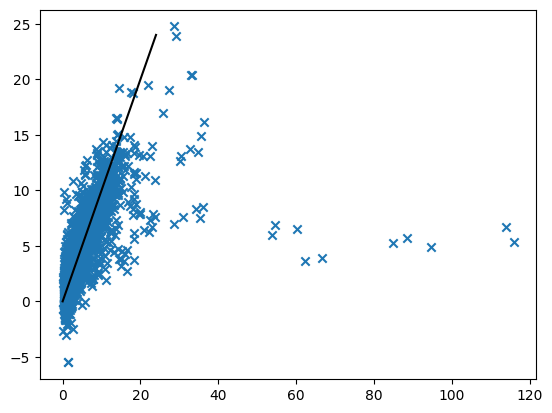

In [26]:
# Find performance on test set
print("Test R-squared: " + str(lasso.score(X_test, y_test)))

lasso_y_test_pred = lasso.predict(X_test)
lasso_y_test_pred = lasso_y_test_pred*math.sqrt(y_var) + y_mean
lasso_test_rmse = mean_squared_error(y_test_unscaled, lasso_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(lasso_test_rmse))

# Plot result differences (just to see)
lasso_test_results = pd.DataFrame({'y_pred': lasso_y_test_pred, 'y_true': y_test_unscaled})
lasso_fig, lasso_plot = plt.subplots()
lasso_plot.plot(range(25), color='black')
lasso_plot.scatter(lasso_test_results.y_true, lasso_test_results.y_pred, marker='x')

# L2 Penalty (Ridge Regression)

In [27]:
# Fit model, find coefficients
ridge = linear_model.RidgeCV().fit(X_train, y_train)
print("Alpha selected: " + str(ridge.alpha_))
ridge_coefs = pd.DataFrame({'feature': X.columns, 'coef': ridge.coef_})

# Find performance on train set
print("Train R-squared: " + str(ridge.score(X_train, y_train)))

ridge_y_train_pred = ridge.predict(X_train)
ridge_y_train_pred = ridge_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, ridge_y_train_pred, squared=False)))

Alpha selected: 10.0
Train R-squared: 0.3924221139010222
Train RMSE (Unscaled): 3.518832319568296


Test R-squared: 0.33363959477610283
Test RMSE (Unscaled): 4.068951782675154


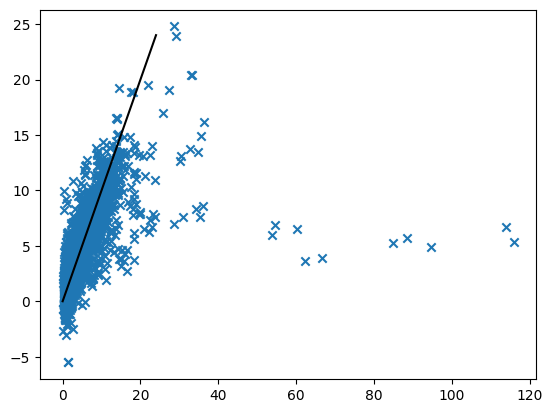

In [28]:
# Find performance on test set
print("Test R-squared: " + str(ridge.score(X_test, y_test)))

ridge_y_test_pred = ridge.predict(X_test)
ridge_y_test_pred = ridge_y_test_pred*math.sqrt(y_var) + y_mean
ridge_test_rmse = mean_squared_error(y_test_unscaled, ridge_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(ridge_test_rmse))

# Plot result differences (just to see)
ridge_test_results = pd.DataFrame({'y_pred': ridge_y_test_pred, 'y_true': y_test_unscaled})
ridge_fig, ridge_plot = plt.subplots()
ridge_plot.plot(range(25), color='black')
ridge_plot.scatter(ridge_test_results.y_true, ridge_test_results.y_pred, marker='x')

# L1 & L2 Penalties (ElasticNet)

In [29]:
# Fit model, find coefficients
en = linear_model.ElasticNetCV().fit(X_train, y_train)
print("Alpha selected: " + str(en.alpha_))
en_coefs = pd.DataFrame({'feature': X.columns, 'coef': en.coef_})

# Find performance on train set
print("Train R-squared: " + str(en.score(X_train, y_train)))

en_y_train_pred = en.predict(X_train)
en_y_train_pred = en_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, en_y_train_pred, squared=False)))

Alpha selected: 0.001016696055394639
Train R-squared: 0.39241808094877095
Train RMSE (Unscaled): 3.5188439981197206


Test R-squared: 0.33363919952748167
Test RMSE (Unscaled): 4.068952989415029


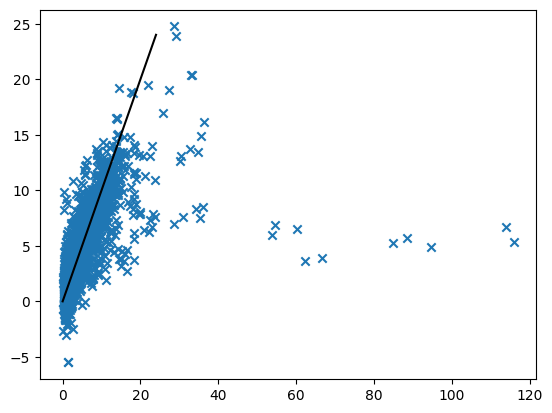

In [30]:
# Find performance on test set
print("Test R-squared: " + str(en.score(X_test, y_test)))

en_y_test_pred = en.predict(X_test)
en_y_test_pred = en_y_test_pred*math.sqrt(y_var) + y_mean
en_test_rmse = mean_squared_error(y_test_unscaled, en_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(en_test_rmse))

# Plot result differences (just to see)
en_test_results = pd.DataFrame({'y_pred': en_y_test_pred, 'y_true': y_test_unscaled})
en_fig, en_plot = plt.subplots()
en_plot.plot(range(25), color='black')
en_plot.scatter(en_test_results.y_true, en_test_results.y_pred, marker='x')

# Errors

In [31]:
results = pd.DataFrame({
    'type': ['Linear (No Scaling)', 'Linear', 'Ridge', 'Lasso', 'ElasticNet'], 
    'test rmse': [linear_ns_test_rmse, linear_test_rmse, ridge_test_rmse, lasso_test_rmse, en_test_rmse]
})
results.loc[results['test rmse'].idxmin()]

type         Linear (No Scaling)
test rmse               4.068928
Name: 0, dtype: object

In [32]:
results

,type,test rmse
0,Linear (No Scaling),4.068928
1,Linear,4.068928
2,Ridge,4.068952
3,Lasso,4.068943
4,ElasticNet,4.068953


# SVM

Linear Kernel

In [6]:
# Fit model, find coefficients
svm_lin = svm.SVR(kernel='linear').fit(X_train, y_train)
svm_lin_coefs = pd.DataFrame({'feature': X.columns, 'coef': svm_lin.coef_[0]})

# Find performance on train set
print("Train R-squared: " + str(svm_lin.score(X_train, y_train)))

svm_lin_y_train_pred = svm_lin.predict(X_train)
svm_lin_y_train_pred = svm_lin_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, svm_lin_y_train_pred, squared=False)))

Train R-squared: 0.36662961234745406
Train RMSE (Unscaled): 3.5927456338145043


Test R-squared: 0.3104042062764303
Test RMSE (Unscaled): 4.139284274440976


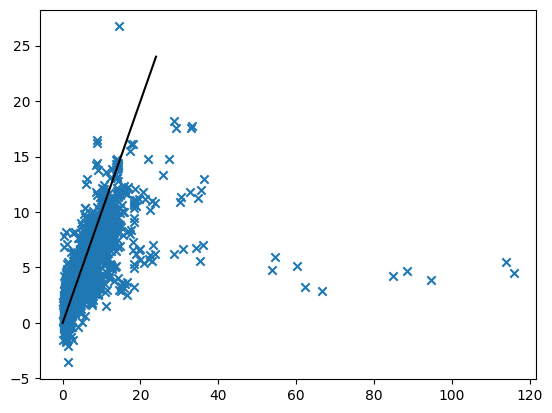

In [7]:
# Find performance on test set
print("Test R-squared: " + str(svm_lin.score(X_test, y_test)))

svm_lin_y_test_pred = svm_lin.predict(X_test)
svm_lin_y_test_pred = svm_lin_y_test_pred*math.sqrt(y_var) + y_mean
svm_lin_test_rmse = mean_squared_error(y_test_unscaled, svm_lin_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(svm_lin_test_rmse))

# Plot result differences (just to see)
svm_lin_test_results = pd.DataFrame({'y_pred': svm_lin_y_test_pred, 'y_true': y_test_unscaled})
svm_lin_fig, svm_lin_plot = plt.subplots()
svm_lin_plot.plot(range(25), color='black')
svm_lin_plot.scatter(svm_lin_test_results.y_true, svm_lin_test_results.y_pred, marker='x')

Poly Kernel

In [8]:
# Fit model, find coefficients
svm_poly = svm.SVR(kernel='poly').fit(X_train, y_train)
# svm_poly_coefs = pd.DataFrame({'feature': X.columns, 'coef': svm_poly.coef_[0]})

# Find performance on train set
print("Train R-squared: " + str(svm_poly.score(X_train, y_train)))

svm_poly_y_train_pred = svm_poly.predict(X_train)
svm_poly_y_train_pred = svm_poly_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, svm_poly_y_train_pred, squared=False)))

Train R-squared: 0.45123304725201496
Train RMSE (Unscaled): 3.3441948047967704


Test R-squared: 0.2601163597950771
Test RMSE (Unscaled): 4.287554603343901


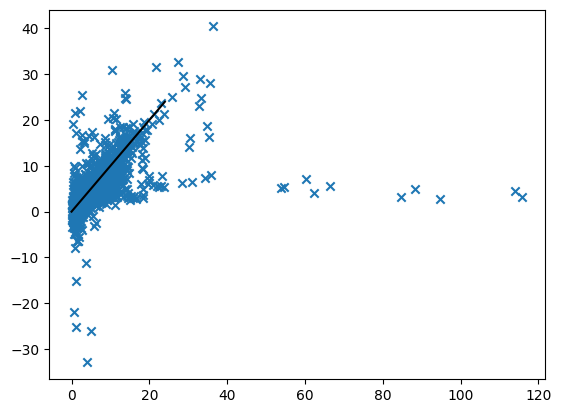

In [9]:
# Find performance on test set
print("Test R-squared: " + str(svm_poly.score(X_test, y_test)))

svm_poly_y_test_pred = svm_poly.predict(X_test)
svm_poly_y_test_pred = svm_poly_y_test_pred*math.sqrt(y_var) + y_mean
svm_poly_test_rmse = mean_squared_error(y_test_unscaled, svm_poly_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(svm_poly_test_rmse))

# Plot result differences (just to see)
svm_poly_test_results = pd.DataFrame({'y_pred': svm_poly_y_test_pred, 'y_true': y_test_unscaled})
svm_poly_fig, svm_poly_plot = plt.subplots()
svm_poly_plot.plot(range(25), color='black')
svm_poly_plot.scatter(svm_poly_test_results.y_true, svm_poly_test_results.y_pred, marker='x')

rbf Kernel

In [10]:
# Fit model, find coefficients
svm_rbf = svm.SVR(kernel='rbf').fit(X_train, y_train)
# svm_poly_coefs = pd.DataFrame({'feature': X.columns, 'coef': svm_poly.coef_[0]})

# Find performance on train set
print("Train R-squared: " + str(svm_rbf.score(X_train, y_train)))

svm_rbf_y_train_pred = svm_rbf.predict(X_train)
svm_rbf_y_train_pred = svm_rbf_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, svm_rbf_y_train_pred, squared=False)))

Train R-squared: 0.47137258551769756
Train RMSE (Unscaled): 3.2822558709483336


Test R-squared: 0.36495947578436416
Test RMSE (Unscaled): 3.9721777252664174


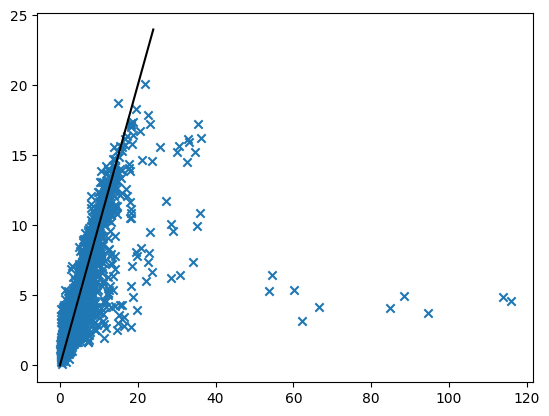

In [11]:
# Find performance on test set
print("Test R-squared: " + str(svm_rbf.score(X_test, y_test)))

svm_rbf_y_test_pred = svm_rbf.predict(X_test)
svm_rbf_y_test_pred = svm_rbf_y_test_pred*math.sqrt(y_var) + y_mean
svm_rbf_test_rmse = mean_squared_error(y_test_unscaled, svm_rbf_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(svm_rbf_test_rmse))

# Plot result differences (just to see)
svm_rbf_test_results = pd.DataFrame({'y_pred': svm_rbf_y_test_pred, 'y_true': y_test_unscaled})
svm_rbf_fig, svm_rbf_plot = plt.subplots()
svm_rbf_plot.plot(range(25), color='black')
svm_rbf_plot.scatter(svm_rbf_test_results.y_true, svm_rbf_test_results.y_pred, marker='x')

# Error

In [14]:
results = pd.DataFrame({
    'type': ['Svm Linear', 'Svm Poly', 'Svm rbf'], 
    'test rmse': [svm_lin_test_rmse, svm_poly_test_rmse, svm_rbf_test_rmse]
})
results.loc[results['test rmse'].idxmin()]

results

,type,test rmse
0,Svm Linear,4.139284
1,Svm Poly,4.287555
2,Svm rbf,3.972178
